 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_path = Path('./Resources/whale_returns.csv')

In [3]:
whale_returns = pd.read_csv(whale_returns_path, infer_datetime_format=True, parse_dates=True)
whale_returns["Date"] = pd.to_datetime(whale_returns["Date"])

In [4]:
# Reading whale returns
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns.isnull().sum().sum()

4

In [6]:
# Drop nulls
whale_returns = whale_returns.dropna(inplace=False)
whale_returns.set_index("Date", inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_path = Path('./Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_path, infer_datetime_format=True, parse_dates=True)
algo_returns["Date"] = pd.to_datetime(algo_returns["Date"])

In [8]:
# Count nulls
algo_returns.isnull().sum().sum()

6

In [9]:
# Drop nulls
algo_returns = algo_returns.dropna(inplace=False)
algo_returns.set_index("Date", inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path('./Resources/sp_tsx_history.csv')
sp_tsx_history = pd.read_csv(sp_tsx_history_path, infer_datetime_format=True, parse_dates=True)


In [11]:
# Check Data Types
df = sp_tsx_history.dtypes
df.head()

Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace('$', '')
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(',', '')
sp_tsx_history["Close"] = pd.to_numeric(sp_tsx_history["Close"])
sp_tsx_history["Date"] = pd.to_datetime(sp_tsx_history["Date"])
df = sp_tsx_history.dtypes
df.head()

Date     datetime64[ns]
Close           float64
dtype: object

In [13]:
# Calculate Daily Returns
sp_tsx_history.set_index("Date", inplace=True)
sp_tsx_history_change = sp_tsx_history.pct_change()

In [14]:
# Drop nulls
sp_tsx_history_change = sp_tsx_history_change.dropna(inplace=False)
sp_tsx_history_change.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_change.columns = ["SP TSX 60 Daily Change"]
sp_tsx_history_change.head()

,SP TSX 60 Daily Change
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_data = pd.concat([sp_tsx_history_change, algo_returns, whale_returns], axis="columns", join="outer")
column_appended_data.head()

,SP TSX 60 Daily Change,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2012-10-02,0.001701,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-03,-0.002563,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,0.007137,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,-0.002305,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-09,-0.011709,NaN,NaN,NaN,NaN,NaN,NaN


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

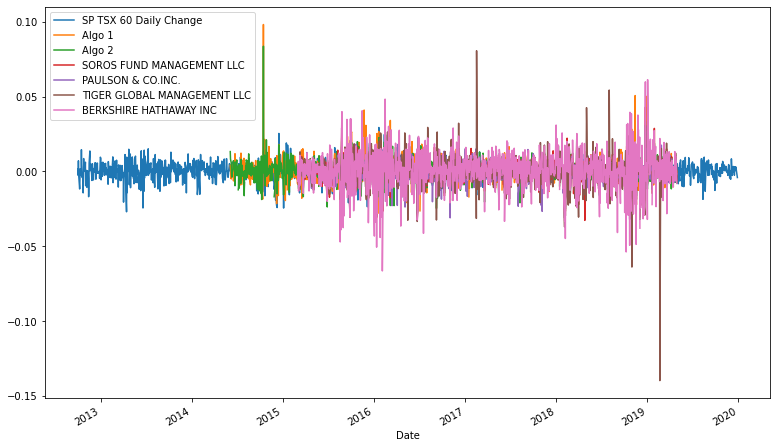

In [17]:
# Plot daily returns of all portfolios
column_appended_data.plot(figsize=(13,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

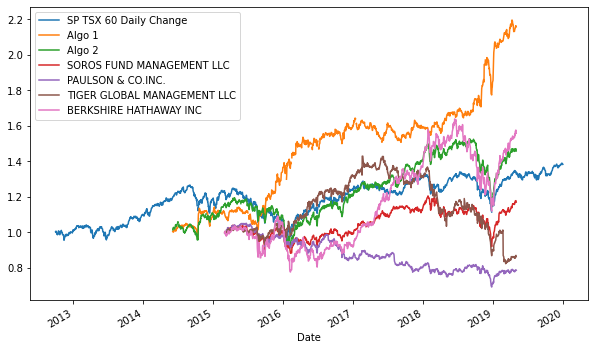

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + column_appended_data).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,6))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

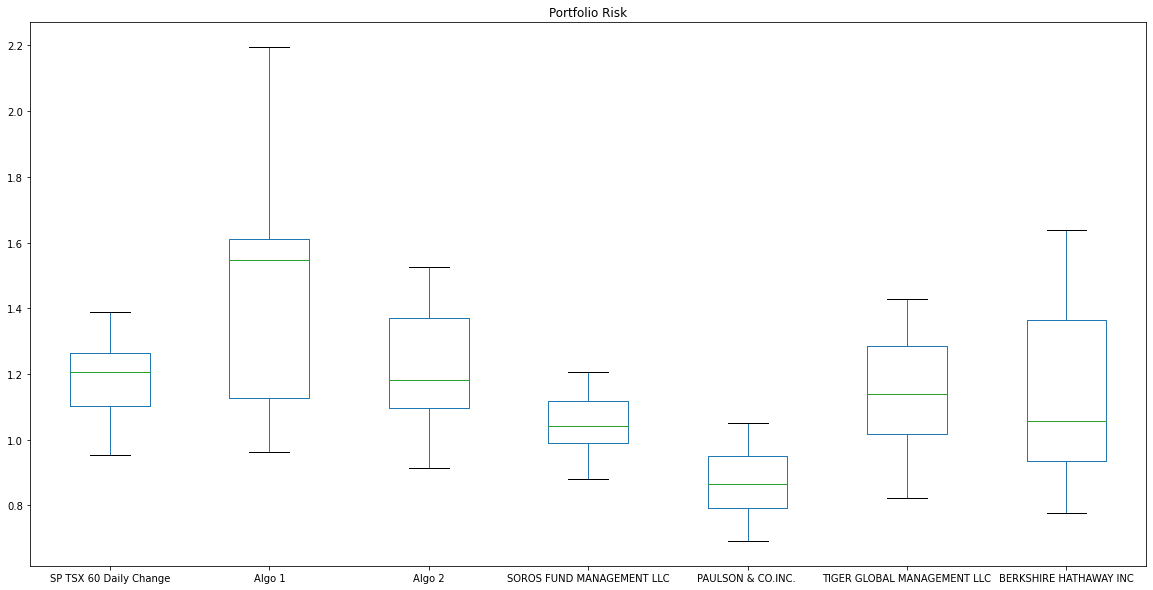

In [19]:
# Box plot to visually show risk
cumulative_returns.plot(kind = 'box', figsize = (20,10), title="Portfolio Risk")

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std_df = pd.DataFrame(cumulative_returns.std()).rename(columns = {0:"Standard Deviation"})
daily_std_df.head()

,Standard Deviation
SP TSX 60 Daily Change,0.107322
Algo 1,0.294720
Algo 2,0.159139
SOROS FUND MANAGEMENT LLC,0.073730
PAULSON & CO.INC.,0.088385


### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
std_sp_tsx = daily_std_df.loc["SP TSX 60 Daily Change", "Standard Deviation"] 
print(std_sp_tsx)

# Determine which portfolios are riskier than the S&P TSX 60

higher_std = daily_std_df[daily_std_df["Standard Deviation"] > daily_std_df.loc["SP TSX 60 Daily Change", "Standard Deviation"]]
higher_std



0.10732239337279492


,Standard Deviation
Algo 1,0.294720
Algo 2,0.159139
TIGER GLOBAL MANAGEMENT LLC,0.151043
BERKSHIRE HATHAWAY INC,0.242778


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df = daily_std_df*np.sqrt(252)
annualized_std_df

,Standard Deviation
SP TSX 60 Daily Change,1.703690
Algo 1,4.678542
Algo 2,2.526253
SOROS FUND MANAGEMENT LLC,1.170421
PAULSON & CO.INC.,1.403073
TIGER GLOBAL MANAGEMENT LLC,2.397739
BERKSHIRE HATHAWAY INC,3.853978


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

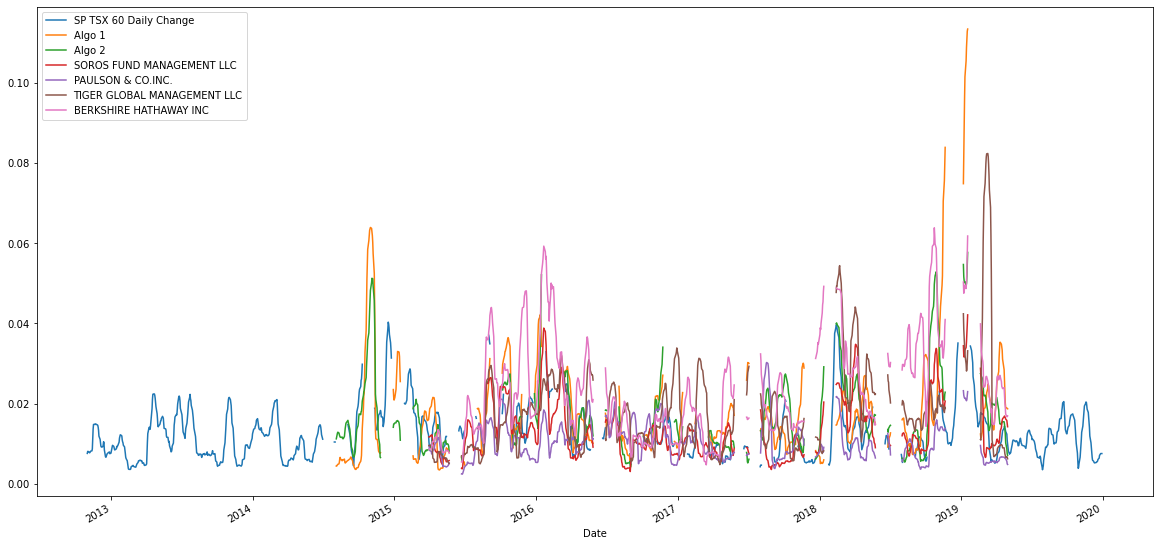

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling = cumulative_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling.plot(figsize = (20,10))


### Calculate and plot the correlation

                             SP TSX 60 Daily Change    Algo 1    Algo 2  \
SP TSX 60 Daily Change                     1.000000 -0.582054  0.318839   
Algo 1                                    -0.582054  1.000000  0.407947   
Algo 2                                     0.318839  0.407947  1.000000   
SOROS FUND MANAGEMENT LLC                  0.234233  0.322148  0.769290   
PAULSON & CO.INC.                          0.072990 -0.103908 -0.130682   
TIGER GLOBAL MANAGEMENT LLC               -0.082271 -0.357482 -0.303193   
BERKSHIRE HATHAWAY INC                     0.172237  0.086622  0.601386   

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SP TSX 60 Daily Change                        0.234233            0.072990   
Algo 1                                        0.322148           -0.103908   
Algo 2                                        0.769290           -0.130682   
SOROS FUND MANAGEMENT LLC                     1.000000           -0.172771   
PAULSON &

<AxesSubplot:>

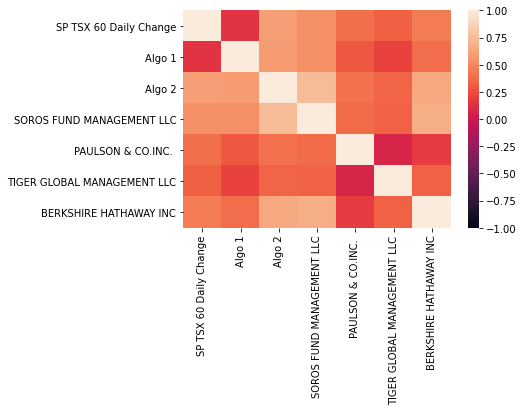

In [24]:
# Calculate the correlation
correlation_df = rolling.corr()

# Display de correlation matrix
corrMatrix = correlation_df.corr()
print(corrMatrix)
sns.heatmap(correlation_df, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH Returns vs. SP TSX 60 Returns'}, xlabel='Date'>

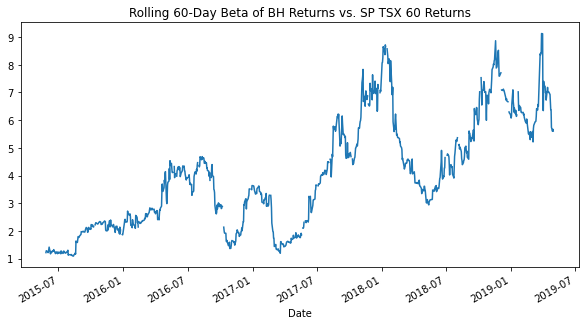

In [25]:
# Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60
# Calculate covariance of a single portfolio
rolling_covariance = whale_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov()

# Calculate variance of S&P TSX
rolling_variance = sp_tsx_history_change['SP TSX 60 Daily Change'].rolling(window = 60).var()

# Computing beta
bh_beta = rolling_covariance / rolling_variance

# Plot beta trend
bh_beta.plot(figsize=(10, 5), title='Rolling 60-Day Beta of BH Returns vs. SP TSX 60 Returns')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

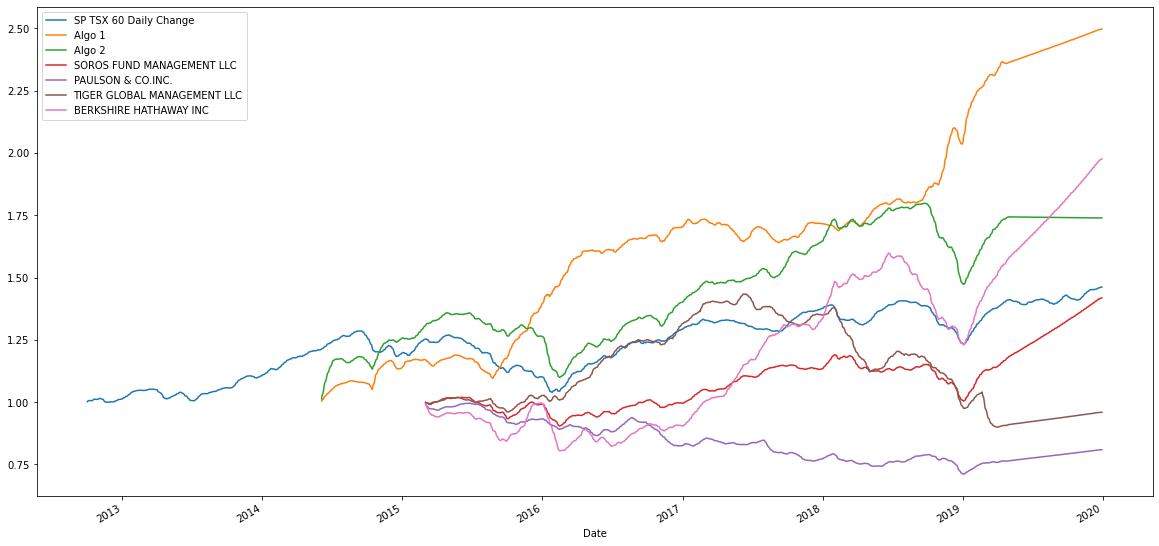

In [26]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = column_appended_data.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualzied Sharpe Ratios
sharpe_ratios = column_appended_data.mean()*252/(column_appended_data.std()*np.sqrt(252))
sharpe_ratios

SP TSX 60 Daily Change         0.478866
Algo 1                         1.300176
Algo 2                         0.639258
SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

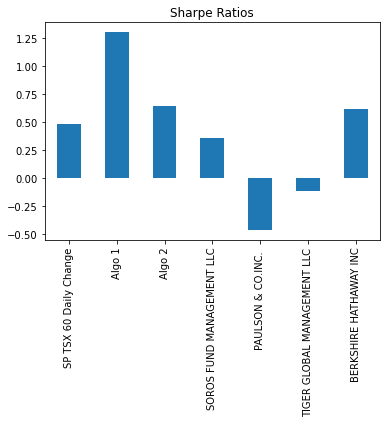

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

It was found using the Sharpe Ratio that Algo 1 outperformed the market and whales while algo 2 also outpeformed the market but did not peform as well as BHI.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [29]:
# Reading data from 1st stock
shop_path = Path('./Resources/shop_historical.csv')
shop_df = pd.read_csv(shop_path, infer_datetime_format=True, parse_dates=True)
shop_df["Date"] = pd.to_datetime(shop_df["Date"])
shop_df.set_index("Date", inplace=True)

In [30]:
# Reading data from 2nd stock
otex_path = Path('./Resources/otex_historical.csv')
otex_df = pd.read_csv(otex_path, infer_datetime_format=True, parse_dates=True)
otex_df["Date"] = pd.to_datetime(otex_df["Date"])
otex_df.set_index("Date", inplace=True)

In [31]:
# Reading data from 3rd stock
l_path = Path('./Resources/l_historical.csv')
l_df = pd.read_csv(l_path, infer_datetime_format=True, parse_dates=True)
l_df["Date"] = pd.to_datetime(l_df["Date"])
l_df.set_index("Date", inplace=True)

In [32]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([shop_df, otex_df, l_df], axis="columns", join="outer")
combined_df.head()


,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [33]:
# Reset Date index

In [34]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['x', 'SHOP','y','OTEX','z','L']

combined_df = combined_df.drop(columns = ['x','y','z'])


In [35]:
# Calculate daily returns
combined_df["SHOP"] = pd.to_numeric(combined_df["SHOP"])
combined_df["OTEX"] = pd.to_numeric(combined_df["OTEX"])
combined_df["L"] = pd.to_numeric(combined_df["L"])

combined_df_r = combined_df.pct_change()


# Drop NAs
combined_df_r = combined_df_r.dropna()

# Display sample data
combined_df_r


,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

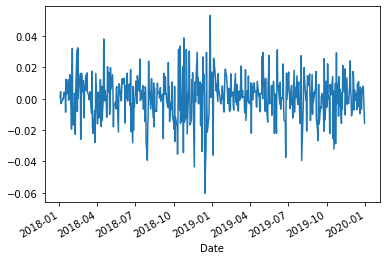

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio = combined_df_r.dot(weights)

# Display sample data
my_portfolio.head()
my_portfolio.plot()



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns2 = pd.concat([my_portfolio, column_appended_data], axis="columns", join="outer")
all_portfolio_returns2.columns = ['My Portfolio', 'SP TSX 60 Daily Change','Algo 1','Algo 2','SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC']


all_portfolio_returns2.head()

,My Portfolio,SP TSX 60 Daily Change,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2012-10-02,NaN,0.001701,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-03,NaN,-0.002563,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,NaN,0.007137,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,NaN,-0.002305,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-09,NaN,-0.011709,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns2 = all_portfolio_returns2.dropna()
all_portfolio_returns2.head()

,My Portfolio,SP TSX 60 Daily Change,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2018-01-03,0.000565,0.003774,-0.000890,0.008175,0.004658,0.000027,0.001979,0.005676
2018-01-04,0.004517,0.002528,-0.000914,0.004294,-0.000914,0.004196,0.010743,0.004065
2018-01-05,-0.003126,-0.003869,-0.003839,0.006405,0.004072,0.000823,0.000737,0.022023
2018-01-08,-0.000997,-0.001944,0.001653,0.000658,0.004473,-0.003739,0.005085,0.003435
2018-01-09,-0.000999,0.000097,-0.001004,-0.002091,-0.001028,0.000872,0.001789,0.000708


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
daily_std = all_portfolio_returns2.std()

annualized_std_df2 = daily_std*np.sqrt(252)
annualized_std_df


,Standard Deviation
SP TSX 60 Daily Change,1.703690
Algo 1,4.678542
Algo 2,2.526253
SOROS FUND MANAGEMENT LLC,1.170421
PAULSON & CO.INC.,1.403073
TIGER GLOBAL MANAGEMENT LLC,2.397739
BERKSHIRE HATHAWAY INC,3.853978


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

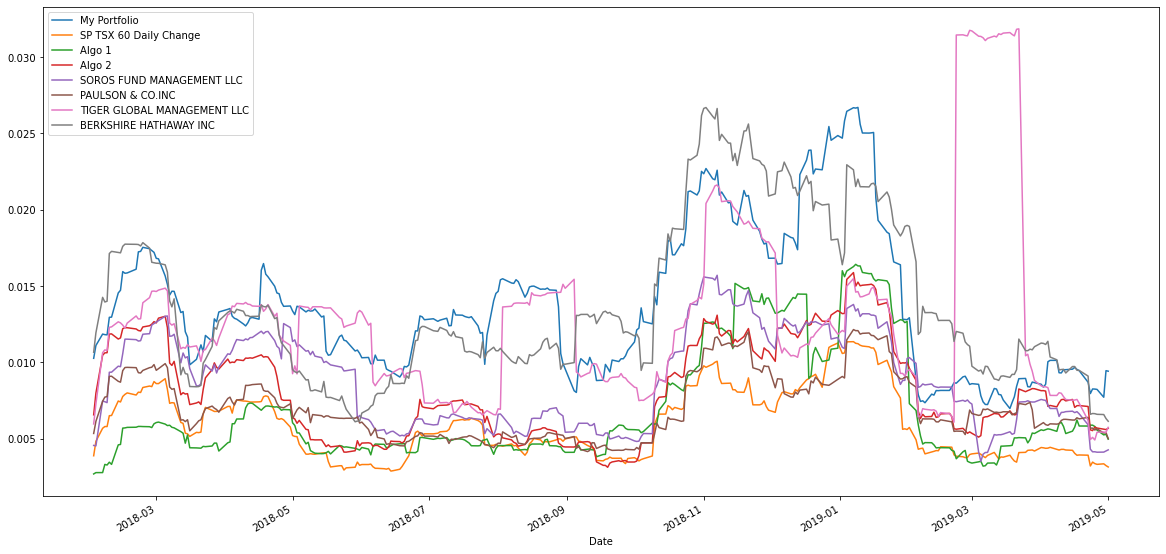

In [46]:
# Calculate rolling standard deviation

rolling2 = all_portfolio_returns2.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling2.plot(figsize = (20,10))



### Calculate and plot the correlation

                             My Portfolio  SP TSX 60 Daily Change    Algo 1  \
My Portfolio                     1.000000                0.956710  0.903041   
SP TSX 60 Daily Change           0.956710                1.000000  0.872901   
Algo 1                           0.903041                0.872901  1.000000   
Algo 2                           0.882137                0.974911  0.841474   
SOROS FUND MANAGEMENT LLC        0.861871                0.917898  0.799094   
PAULSON & CO.INC                 0.770246                0.881704  0.791199   
TIGER GLOBAL MANAGEMENT LLC     -0.975945               -0.955068 -0.935352   
BERKSHIRE HATHAWAY INC           0.918116                0.925771  0.935561   

                               Algo 2  SOROS FUND MANAGEMENT LLC  \
My Portfolio                 0.882137                   0.861871   
SP TSX 60 Daily Change       0.974911                   0.917898   
Algo 1                       0.841474                   0.799094   
Algo 2          

<AxesSubplot:>

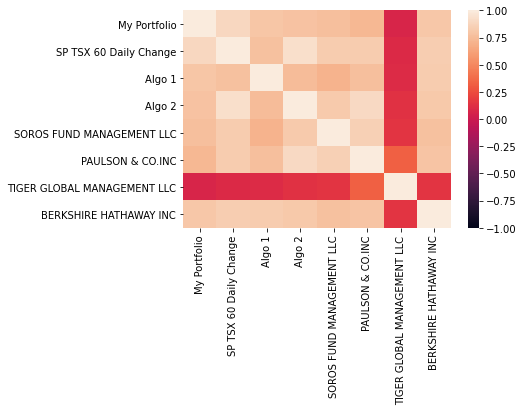

In [47]:
# Calculate and plot the correlation
correlation_df2 = rolling2.corr()

# Display de correlation matrix
corrMatrix2 = correlation_df2.corr()
print(corrMatrix2)
sns.heatmap(correlation_df2, vmin=-1, vmax=1)


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio Returns vs. SP TSX 60 Returns'}, xlabel='Date'>

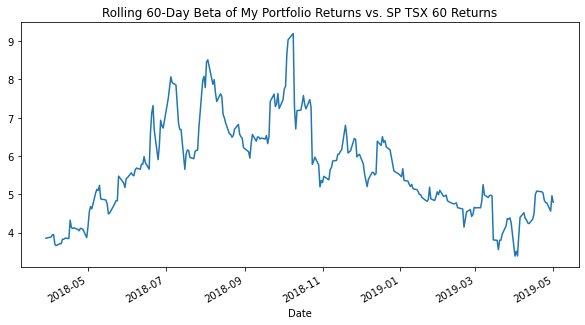

In [48]:
# Calculate and plot Beta
# Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60
# Calculate covariance of a single portfolio
rolling_covariance2 = all_portfolio_returns2['My Portfolio'].rolling(window=60).cov()

# Calculate variance of S&P TSX
rolling_variance2 = all_portfolio_returns2['SP TSX 60 Daily Change'].rolling(window = 60).var()

# Computing beta
bh_beta2 = rolling_covariance2 / rolling_variance2

# Plot beta trend
bh_beta2.plot(figsize=(10, 5), title='Rolling 60-Day Beta of My Portfolio Returns vs. SP TSX 60 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = all_portfolio_returns2.mean()*252/(all_portfolio_returns2.std()*np.sqrt(252))
sharpe_ratios2

My Portfolio                   1.564547
SP TSX 60 Daily Change         0.034651
Algo 1                         1.901461
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC              -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

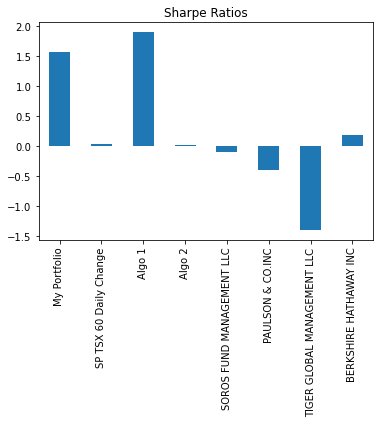

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [54]:
###According to the Sharpe Ratios, My Portfolio peforms better in comparison to all besides Algo 1